In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Population Distribution

In [2]:
united = Table.read_table('../Datasets/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


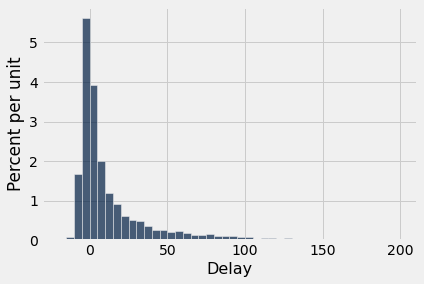

In [3]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

In [4]:
# (Population) Parameter
pop_median = np.median(united.column('Delay'))
pop_median

2.0

## Sample Statistic

In [5]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [6]:
sample_median(100)

2.5

## Empirical Distributions of a Statistic

In [7]:
num_simulations = 5000

sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(100)
    sample_medians = np.append(sample_medians, new_median)

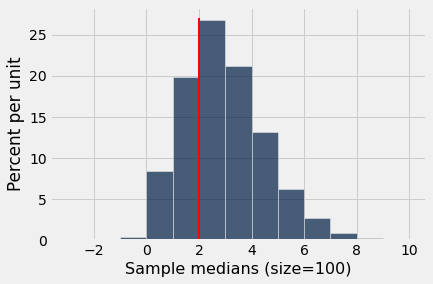

In [8]:
sampling_bins = np.arange(-3, 11, 1)

Table().with_column('Sample medians (size=100)', sample_medians).hist(bins = sampling_bins)
plots.plot([pop_median, pop_median], [0,.27], color='red', lw=2);

## Bootstrapping

In [9]:
our_sample = united.sample(100, with_replacement=False)
our_sample

Row,Date,Flight Number,Destination,Delay
6127,7/12/15,401,CLE,-8
10970,8/12/15,1168,EWR,11
11175,8/13/15,1699,ATL,8
5894,7/10/15,1180,LAX,3
933,6/7/15,662,MSP,-3
3185,6/22/15,595,PDX,-2
12553,8/23/15,477,DFW,-3
13818,8/31/15,1960,LAX,6
760,6/6/15,72,SEA,-5
6469,7/14/15,814,LAX,7


In [10]:
our_sample_median = np.median(our_sample.column('Delay'))
our_sample_median

1.0

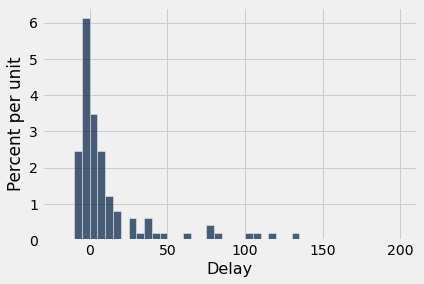

In [11]:
our_sample.hist('Delay', bins=united_bins)

Population Median =        2.0
Our Sample Median =        1.0
Bootstrap Sample Median =  1.0


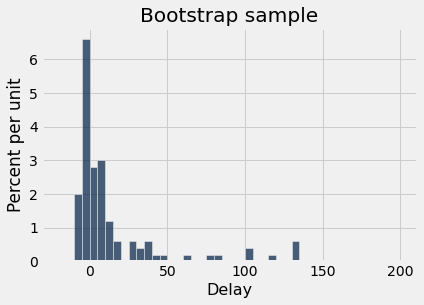

In [12]:
# Take a bootstrap (re)sample of size 100, WITH replacement

boot_sample = our_sample.sample(100, with_replacement=True)
boot_sample.hist('Delay', bins=united_bins)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", np.median(boot_sample.column('Delay')))

## Bootstrap Distribution

In [13]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return np.median(single_sample.column('Delay'))

In [14]:
bootstrap_medians = make_array()

for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

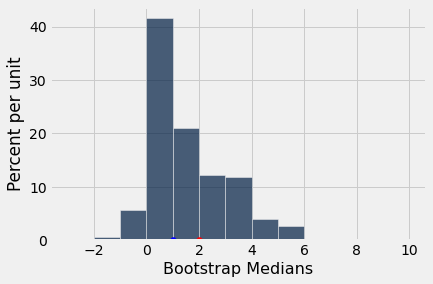

In [15]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist(
    'Bootstrap Medians', bins = sampling_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");

## Percentiles

In [16]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [17]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [18]:
# Step 2. Figure out where 55th percentile would be.

np.ceil(55/100 * 6)

4.0

In [19]:
np.sort(x).item(4 - 1)

34

In [20]:
# OR: 1 Line of Code
percentile(55, x)

34

## Confidence Intervals

In [21]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

left, right

(-1.0, 5.0)

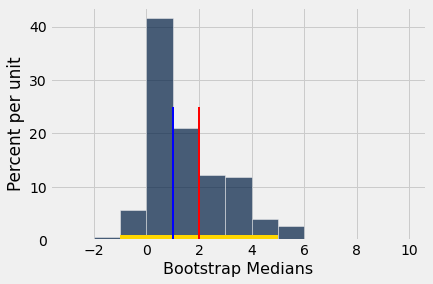

In [22]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins = sampling_bins)

plots.plot([left, right], [0,0], color="gold",lw=10, zorder=1);
plots.plot([pop_median, pop_median], [0,0.25], color="red",lw=2, zorder=1);
plots.plot([our_sample_median, our_sample_median], [0,0.25], color="blue",lw=2, zorder=1);